HW

# Desicion Tree 

# Random Forest

# Neural Network 

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier
import sklearn
from skompiler import skompile

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

from warnings import filterwarnings
filterwarnings('ignore')

In [30]:
def karsilastirmaCart(cart_a,cart_b):
    print("Cart before tuning: ",cart_b)
    print("Cart after tuning:  ",cart_a)
    
    if(cart_a > cart_b):
        print("İyileşme Oranı : ", cart_a - cart_b)

In [45]:
def karsilastirmaRFR(rf_a,rf_b):
    print("Random Forest before tuning: ",rf_b)
    print("Random Forest after tuning:  ",rf_a)

In [49]:
def importanceFun(x):
    Importance = pd.DataFrame({"Importance": x.feature_importances_*100},
                          index = xtrain.columns)
    Importance.sort_values(by="Importance", axis=0, ascending=True).plot(kind="barh")
    plt.xlabel("Degisken Onem Duzeyleri")
    plt.show()

In [66]:
def RandomForestRegKarsilastirma(rfr_a,rfr_b):
    print("Random Forest before tuning MSE : ",rfr_b)
    print("Random Forest after tuning MSE:  ",rfr_a)

In [80]:
def NNKarsilastirma(nn_a,nn_b):
    print("NN before tuning: ",nn_b)
    print("NN after tuning:  ",nn_a)
    
    if(cart_a > cart_b):
        print("İyileşme Oranı : ", nn_a - nn_b)

In [93]:
def NNRkarsilastirma(nnr_a,nnr_b):
    print("NNRkarsilastirma before tuning: ",nnr_b)
    print("NNRkarsilastirma after tuning:  ",nnr_a)

# Decision Tree

# Decision Tree Classification

0=iyi , 1 = kötü

In [2]:
data = pd.read_csv("hmelq.csv")
df = data.copy()
df=df.dropna()

In [3]:
df.head(1)

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056


In [4]:
data.select_dtypes(include=["object"]).T

,0,1,2,3,4,5,6,7,8,9,...,3566,3567,3568,3569,3570,3571,3572,3573,3574,3575
reason,HomeImp,DebtCon,DebtCon,DebtCon,DebtCon,DebtCon,HomeImp,DebtCon,DebtCon,DebtCon,...,HomeImp,DebtCon,DebtCon,NaN,HomeImp,DebtCon,DebtCon,DebtCon,HomeImp,DebtCon
job,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Self,Self,Self,Self,Self,Self,Self,Self,Self,Self


Bunlar kategorik değişkenler olduğundan, karar ağacı sınıflandırmada kullanmak için  önce dummye çevirmemiz gerekir.

In [7]:
dummy_variable=pd.get_dummies(df[['reason','job']])

In [8]:
y=df['bad']

In [9]:
X_ = df.drop(['bad','reason','job'],axis=1).astype('float64')
X_.head(0)

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc


In [10]:
X = pd.concat((X_,dummy_variable),axis=1)
X.head(0).T

""
loan
mortdue
value
yoj
derog
delinq
clage
ninq
clno
debtinc


In [11]:
df.bad = [ "kötü" if i==1 else "iyi" for i in df.bad ]

In [12]:
X.shape

(2018, 18)

In [13]:
y.shape

(2018,)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.30,
                                                    random_state=42)
print("X_train shape",X_train.shape)
print("X_test shape",X_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

X_train shape (1412, 18)
X_test shape (606, 18)
y_train shape (1412,)
y_test shape (606,)


### Model Tahmin

In [15]:
cart = DecisionTreeClassifier()

In [16]:
cart_model = cart.fit(X_train,y_train)

In [15]:
?cart_model

In [17]:
print(skompile(cart_model.predict).to("python/code"))

((((((0 if x[2] <= 36741.5 else (0 if x[1] <= 16220.0 else 1) if x[3] <= 
    7.0 else 0) if x[9] <= 32.76449966430664 else 0 if x[3] <= 1.5 else (0 if
    x[10] <= 0.5 else 1) if x[8] <= 6.0 else 1) if x[0] <= 12750.0 else 0 if
    x[7] <= 4.0 else 1) if x[2] <= 48600.0 else ((((((((((1 if x[9] <= 
    33.51150035858154 else 0) if x[1] <= 39828.0 else 1 if x[8] <= 8.0 else
    (1 if x[3] <= 2.5 else (0 if x[7] <= 2.5 else 0 if x[6] <= 
    68.29000091552734 else 1) if x[5] <= 0.5 else 1) if x[6] <= 
    71.81999969482422 else 0 if x[11] <= 0.5 else 0 if x[0] <= 9450.0 else 
    1 if x[0] <= 10050.0 else 0) if x[2] <= 85577.5 else 1) if x[6] <= 
    94.25 else 0 if x[2] <= 72614.0 else 1) if x[2] <= 86023.5 else (0 if x
    [13] <= 0.5 else 1) if x[8] <= 9.5 else 0) if x[6] <= 95.79000091552734
     else (((0 if x[9] <= 32.614999771118164 else 0 if x[0] <= 5300.0 else 
    1) if x[11] <= 0.5 else 0) if x[4] <= 0.5 else 0 if x[8] <= 6.5 else 1) if
    x[0] <= 6950.0 else ((((1 if x[0] <

* 45<x --> 1
* 45>x and 61< --> 0 değilse 1

In [18]:
y_pred = cart_model.predict(X_test)

In [19]:
cart_b = accuracy_score(y_test, y_pred)
cart_b

0.9273927392739274

##### 92%

### Model Tuning

In [20]:
cart_model

DecisionTreeClassifier()

In [20]:
?cart_model

In [21]:
cart_grid = {"max_depth": range(1,10), 
             "min_samples_split": list(range(2,50))}

In [22]:
cart_cv = GridSearchCV(cart,cart_grid, cv = 10, n_jobs=-1,verbose=2)
cart_cv_model = cart_cv.fit(X_train , y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 1616 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:   10.0s finished


In [23]:
print("En iyi parametreler:" + str(cart_cv_model.best_params_))

En iyi parametreler:{'max_depth': 8, 'min_samples_split': 2}


#final

In [24]:
cart = tree.DecisionTreeClassifier(max_depth = 8 , min_samples_split= 2)
cart_tuned = cart.fit(X_train, y_train)

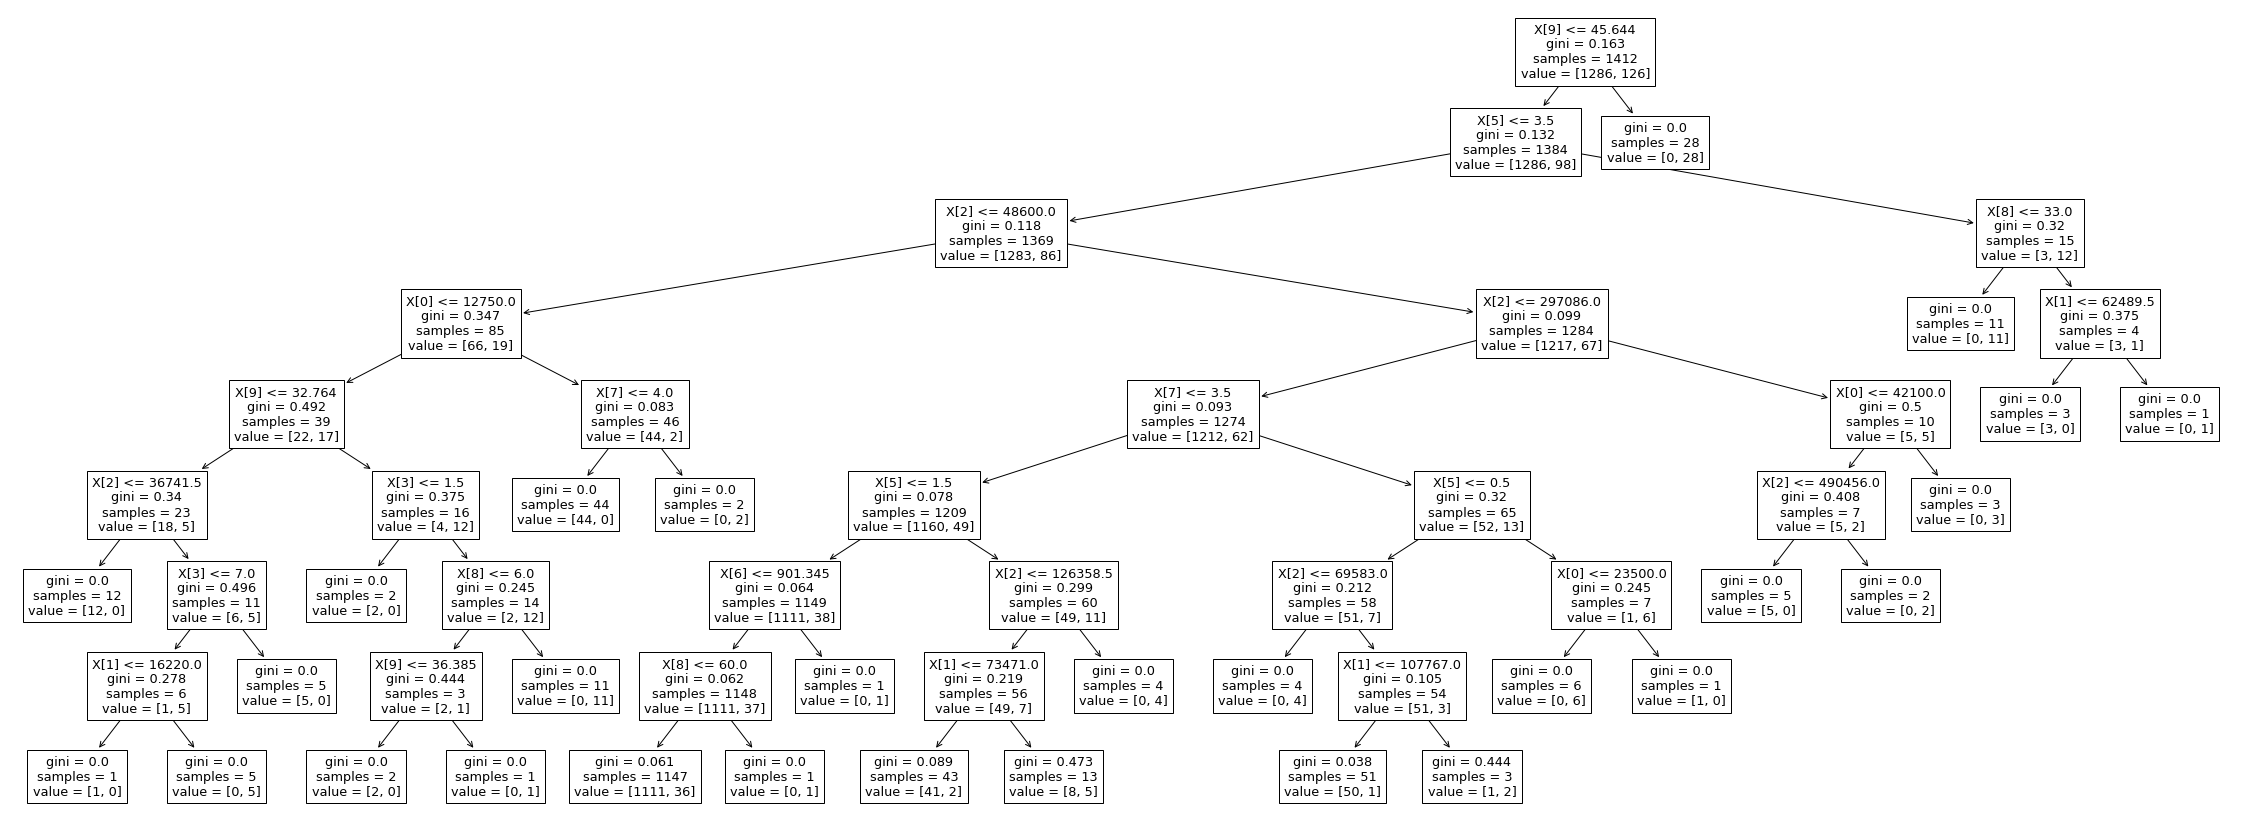

In [25]:
plt.figure(figsize=(40,15))
tree.plot_tree(cart_tuned);

In [26]:
y_pred = cart_tuned.predict(X_test)
cart_a = accuracy_score(y_test, y_pred)
cart_a

0.9455445544554455

#### 94%

In [31]:
karsilastirmaCart(cart_a,cart_b)

Cart before tuning:  0.9273927392739274
Cart after tuning:   0.9455445544554455
İyileşme Oranı :  0.018151815181518094


### Manuel Tree

In [27]:
manuel_tree = df.copy()
manuel_tree


y_mt = manuel_tree['bad']
X_mt = manuel_tree.drop(['bad','reason','job'],axis=1).astype('float64')
X_mt.head(0)

X_mt.head(0)

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc


In [28]:
X_mt.drop(['clage'],axis=1).head(0)

,loan,mortdue,value,yoj,derog,delinq,ninq,clno,debtinc


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_mt,y_mt,
                                                    test_size=0.30,
                                                    random_state=42)

In [30]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train,y_train)
print(skompile(cart_model.predict).to("python/code"))

((((((0 if x[2] <= 36741.5 else (0 if x[9] <= 24.55049991607666 else 1) if 
    x[3] <= 7.0 else 0) if x[9] <= 32.76449966430664 else 0 if x[3] <= 1.5 else
    (0 if x[9] <= 36.38549995422363 else 1) if x[8] <= 6.0 else 1) if x[0] <=
    12750.0 else 0 if x[7] <= 4.0 else 1) if x[2] <= 48600.0 else (((1 if x
    [8] <= 1.5 else ((((((1 if x[9] <= 33.51150035858154 else 0) if x[1] <=
    39828.0 else 1 if x[8] <= 8.0 else ((1 if x[9] <= 25.574999809265137 else
    0 if x[7] <= 2.5 else 1 if x[0] <= 14850.0 else 0) if x[5] <= 0.5 else 
    1) if x[6] <= 71.81999969482422 else 0 if x[1] <= 54188.0 else 1 if x[1
    ] <= 54862.5 else 0) if x[2] <= 85577.5 else 1) if x[6] <= 94.25 else 1 if
    x[7] <= 0.5 else 0) if x[2] <= 86023.5 else (1 if x[7] <= 0.5 else 0) if
    x[8] <= 9.5 else 0) if x[6] <= 95.79000091552734 else (((1 if x[2] <= 
    58848.5 else 0) if x[6] <= 101.53499984741211 else 0 if x[2] <= 
    121453.5 else 1 if x[1] <= 109863.5 else 0) if x[4] <= 0.5 else 1 if x[
    6] <

In [31]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9224422442244224

In [32]:
cart_grid = {"max_depth": range(1,10), 
             "min_samples_split": list(range(2,50))}

cart_cv = GridSearchCV(cart,cart_grid, cv = 10, n_jobs=-1,verbose=2)
cart_cv_model = cart_cv.fit(X_train , y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 4230 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:    9.7s finished


In [33]:
cart = tree.DecisionTreeClassifier(max_depth = 3, min_samples_split=2)
cart_tuned = cart.fit(X_train, y_train)

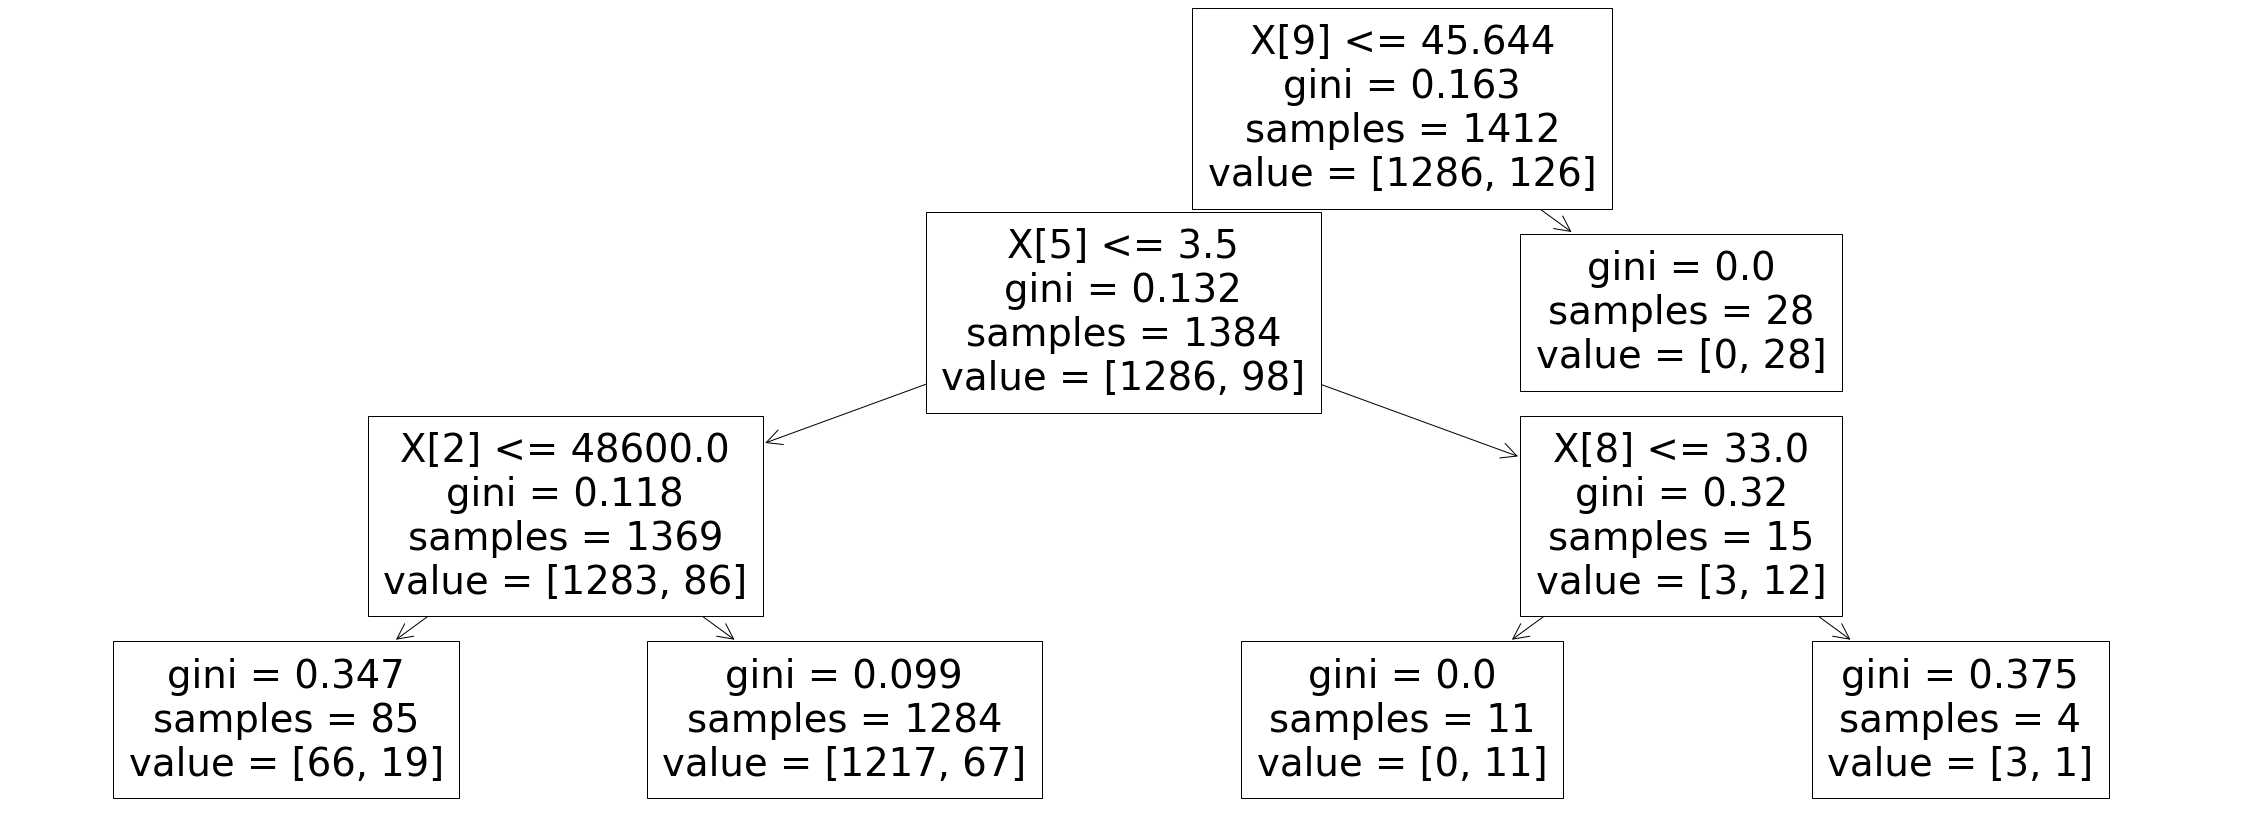

In [34]:
plt.figure(figsize=(40,15))
tree.plot_tree(cart_tuned);

In [35]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9389438943894389

***

# DESICION TREE REGRESSION

In [36]:
data = pd.read_excel("HW_Data_Set.xlsx")
df=data.copy()

In [37]:
df = df.replace('?',np.NaN)

In [38]:
df.isnull().sum().sort_values(ascending=False)

ind_422      1041
ind_420      1041
90_target       0
ind_50          0
ind_61          0
             ... 
ind_309         0
ind_310         0
ind_311         0
ind_313         0
ind_5           0
Length: 136, dtype: int64

In [39]:
df.select_dtypes(include=['float64','int64'])
df.select_dtypes(include=["object"]).T

,0,1,2,3,4,5,6,7,8,9,...,6157,6158,6159,6160,6161,6162,6163,6164,6165,6166
ind_109,GREEN,GREEN,GREEN,GREEN,GREEN,GREEN,GREEN,GREEN,RED,RED,...,GREEN,GREEN,GREEN,GREEN,RED,RED,RED,GREEN,GREEN,GREEN


In [40]:
y_dt = df['90_target']

dummy_dt =  pd.get_dummies(df['ind_109'])

X_dt = df.drop(["20_target","50_target","90_target", "ind_420", "ind_422"],axis=1)
X_dt.head(0)

X_dt =pd.concat([X_dt,dummy_dt],axis=1)

X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.30,
                                               random_state=42)

***

In [41]:
from sklearn.tree import DecisionTreeRegressor

In [42]:
cart_model = DecisionTreeRegressor() 

In [43]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [44]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score

In [45]:
y_pred = cart_model.predict(X_test)

In [46]:
print('MSE: ',np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2: ", r2_score(y_test, y_pred))

MSE:  0.28435556229583564
R2:  -0.030755345737295325


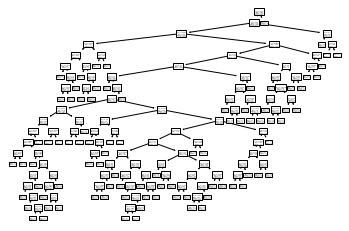

In [47]:
tree.plot_tree(cart_model);

## Model Tuning

In [48]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [49]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.26326209505561055

MSE: 
* 0.2814390178921167 ' di
* 0.2784919312575816 oldu


In [50]:
cart_params = {"min_samples_split": range(10,50),
               "min_samples_leaf": [10,15,20],
               "max_leaf_nodes": range(4,8)}

In [51]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv=10, n_jobs=-1, verbose=2)

In [52]:
cart_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 480 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 4650 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:   10.1s finished


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_leaf_nodes': range(4, 8),
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': range(10, 50)},
             verbose=2)

In [53]:
cart_cv_model.best_params_

{'max_leaf_nodes': 7, 'min_samples_leaf': 10, 'min_samples_split': 10}

In [54]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes=7, 
                                   min_samples_leaf=10, 
                                   min_samples_split=10)
cart_tuned.fit(X_train, y_train)
y_pred = cart_tuned.predict(X_test)

In [55]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.23557275207133196

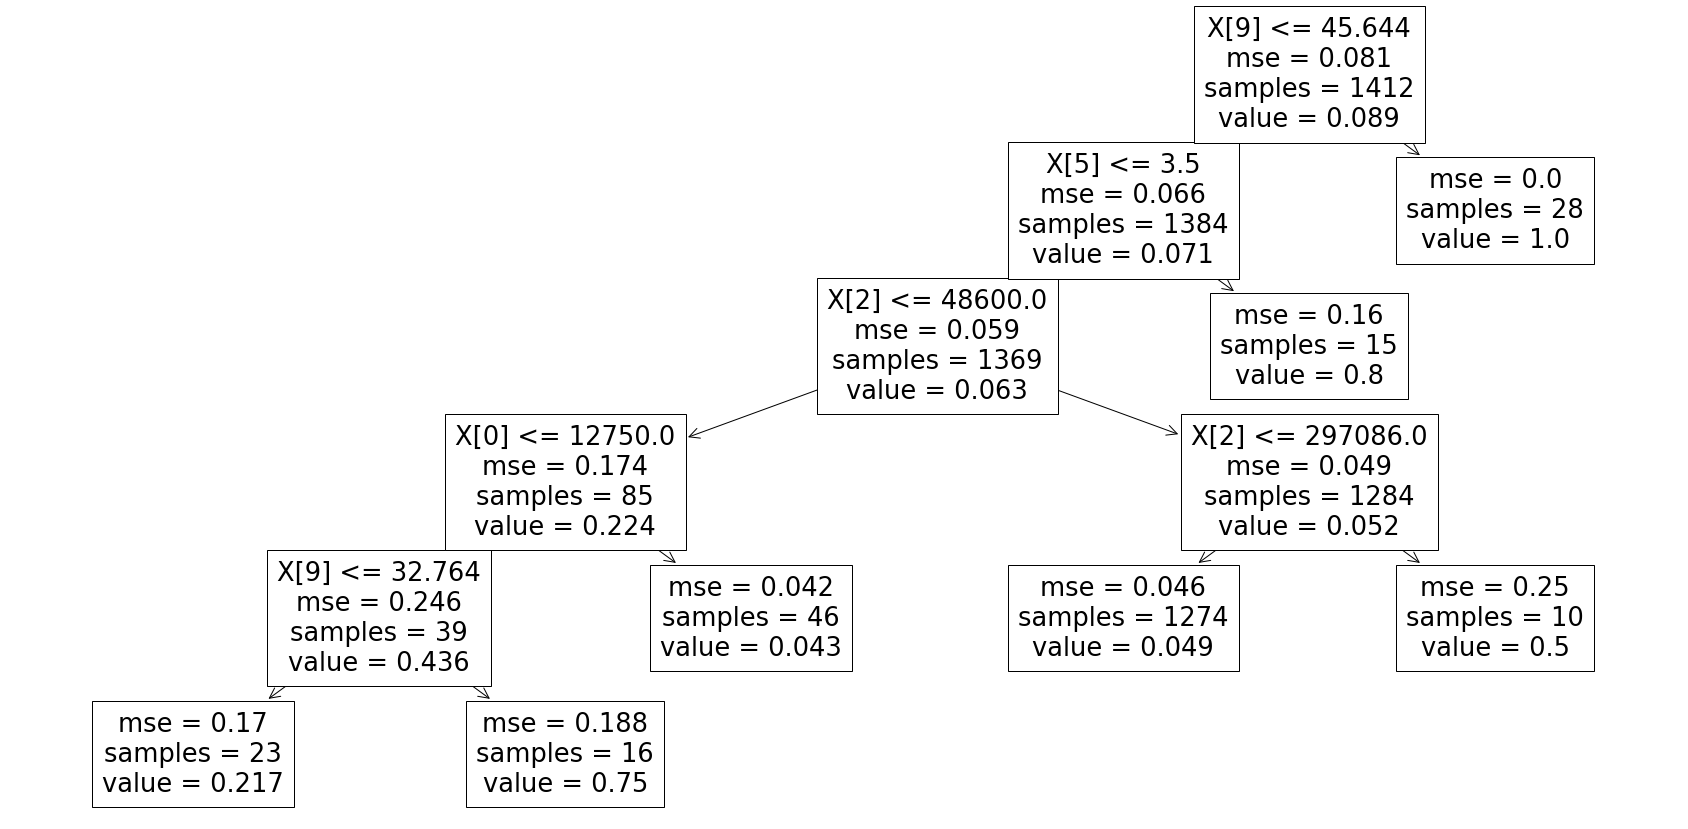

In [56]:
plt.figure(figsize=(30,15))
tree.plot_tree(cart_tuned);

***

# RANDOM FOREST

# RANDOM FOREST CLASSIFICATION

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
data = pd.read_csv("hmelq.csv")
df_ = data.copy()
df_ = df_.dropna()

In [34]:
y_rfc = df_['bad']

dummy_rfc=pd.get_dummies(df_[['reason','job']])
X_rfc = df_.drop(['bad','reason','job'],axis=1).astype('float64')
X_rfc.head(0)

X_rfc_ = pd.concat((X_rfc,dummy_rfc),axis=1)

In [35]:
xtrain, xtest, ytrain, ytest = train_test_split(X_rfc_,y_rfc,
                                                test_size=0.30,
                                                random_state=42)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((1412, 18), (606, 18), (1412,), (606,))

In [36]:
# 50 tree 
rf_model = RandomForestClassifier(n_estimators=50).fit(xtrain, ytrain)
rf_model

RandomForestClassifier(n_estimators=50)

In [62]:
?rf_model

# default=100
# default gini

In [37]:
y_pred = rf_model.predict(xtest)
rf_b = accuracy_score(ytest, y_pred)
rf_b

0.9488448844884488

In [39]:
# 500 tree
rf_model = RandomForestClassifier(n_estimators=500).fit(xtrain, ytrain)
rf_model

RandomForestClassifier(n_estimators=500)

In [40]:
y_pred = rf_model.predict(xtest)
rf_b = accuracy_score(ytest, y_pred)
rf_b

0.9521452145214522

In [41]:
rf_model = RandomForestClassifier().fit(xtrain, ytrain)
rf_model

RandomForestClassifier()

In [42]:
y_pred = rf_model.predict(xtest)
rf_b = accuracy_score(ytest, y_pred)
rf_b

0.9537953795379538

### Model Tuning

In [43]:
rf_params = {"max_depth": [2,9,12,15],
             "max_features": [2,5,8],
             "n_estimators": [50,80,150],
             "min_samples_split": [5,10]}

In [44]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv=10, 
                           n_jobs=-1, 
                           verbose=2)
rf_cv_model.fit(xtrain, ytrain)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 525 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   38.3s finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 9, 12, 15], 'max_features': [2, 5, 8],
                         'min_samples_split': [5, 10],
                         'n_estimators': [50, 80, 150]},
             verbose=2)

In [46]:
rf_cv_model.best_params_

{'max_depth': 15,
 'max_features': 5,
 'min_samples_split': 5,
 'n_estimators': 80}

### Tuned

In [47]:
rf_tuned = RandomForestClassifier(max_depth=15,
                                  max_features= 5,
                                  min_samples_split= 5,
                                  n_estimators= 80)
rf_tuned.fit(xtrain, ytrain)
y_pred = rf_tuned.predict(xtest)
rf_a = accuracy_score(ytest, y_pred)
rf_a

0.9504950495049505

In [48]:
karsilastirmaRFR(rf_a,rf_b)

Random Forest before tuning:  0.9537953795379538
Random Forest after tuning:   0.9504950495049505


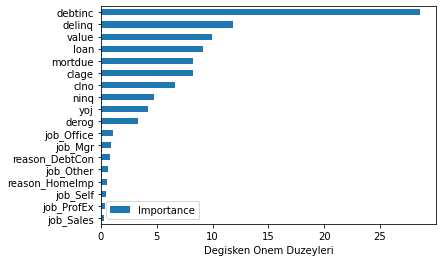

In [50]:
importanceFun(rf_tuned)

# Random Forest Regression

In [51]:
data = pd.read_excel("HW_Data_Set.xlsx")
df=data.copy()

df = df.replace('?',np.NaN)

df.isnull().sum().sort_values(ascending=False)

df.select_dtypes(include=['float64','int64'])
df.select_dtypes(include=["object"]).head(2)

,ind_109
0,GREEN
1,GREEN


In [52]:
dummy_rfr =  pd.get_dummies(df['ind_109'])
y_rfr = df['90_target']

X_rfr = df.drop(["20_target","50_target","90_target", 
                 "ind_420", "ind_422", 'ind_109'],axis=1).astype("float64")

X_rfr =pd.concat([X_rfr,dummy_rfr],axis=1)


X_train,X_test,y_train,y_test=train_test_split(X_rfr,y_rfr,
                                               test_size=0.30,
                                               random_state=42)

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
rfr_model = RandomForestRegressor(random_state=42)
rfr_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

####  Tahmin

In [56]:
from sklearn.metrics import mean_squared_error,r2_score

In [57]:
y_pred = rfr_model.predict(X_test)
rfr_b = np.sqrt(mean_squared_error(y_test, y_pred))
rfr_b

16.0138671212887

#### Tuning

In [58]:
rfr_params = {"max_depth": list(range(1,5)),
              "max_features": [3,5,7],
              "n_estimators": [10,20,50]}
rfr_model = RandomForestRegressor(random_state=42)

rfr_cv_model = GridSearchCV(rfr_model, 
                           rfr_params, 
                           cv=10, 
                           n_jobs=-1, 
                           verbose=2)
rfr_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    7.4s finished


GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4], 'max_features': [3, 5, 7],
                         'n_estimators': [10, 20, 50]},
             verbose=2)

In [59]:
rfr_cv_model.best_params_

{'max_depth': 4, 'max_features': 7, 'n_estimators': 10}

In [60]:
rfr_tuned = RandomForestRegressor(max_depth=4,
                                  max_features=7,
                                  n_estimators=10)
rfr_tuned.fit(X_train, y_train)
y_pred = rfr_tuned.predict(X_test)
rfr_a = np.sqrt(mean_squared_error(y_test, y_pred))
rfr_a

33.74296585209565

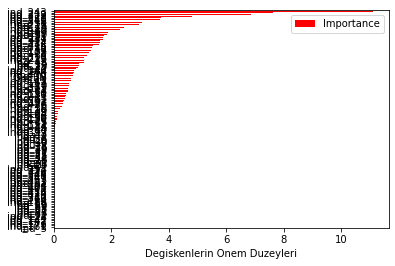

In [64]:
importance.sort_values(by="Importance", axis=0, 
                       ascending=True, na_position='last').plot(kind="barh", color="r")
plt.xlabel("Degiskenlerin Onem Duzeyleri")
plt.show()

In [67]:
RandomForestRegKarsilastirma(rfr_a,rfr_b)

Random Forest before tuning MSE :  16.0138671212887
Random Forest after tuning MSE:   33.74296585209565


# NEURAL NETWORK

# NEURAL NETWORK CLASSIFICATION

In [69]:
def readData(filename):
        data = pd.read_csv(filename)
        print("First 5 data: \n", data.head())
        print("Last 5 data: \n", data.tail())
        return data

In [71]:
data = readData("hmelq.csv")

First 5 data: 
    bad   loan   mortdue     value   reason  job   yoj  derog  delinq   clage  \
0    0  81200   18834.0  108355.0  HomeImp  NaN  28.0    0.0     0.0  139.14   
1    0  12600  103960.0  127384.0  DebtCon  NaN   2.0    0.0     0.0  129.02   
2    0  18000   46865.0   61266.0  DebtCon  NaN   5.0    0.0     0.0  102.59   
3    0  10300   57676.0   71027.0  DebtCon  NaN  19.0    0.0     0.0  157.52   
4    0   9400   56508.0   78358.0  DebtCon  NaN  17.0    0.0     0.0  141.93   

   ninq  clno  debtinc  
0   0.0  14.0   34.042  
1   0.0  25.0   34.479  
2   2.0   9.0   26.354  
3   1.0  11.0   33.992  
4   0.0  11.0   32.327  
Last 5 data: 
       bad   loan   mortdue    value   reason   job  yoj  derog  delinq  \
3571    1   8400   31800.0  72000.0  DebtCon  Self  NaN    0.0     2.0   
3572    1  21600  154991.0      NaN  DebtCon  Self  NaN    2.0     4.0   
3573    1  24000   35000.0      NaN  DebtCon  Self  3.0    1.0     0.0   
3574    1  10000       NaN  25010.0  HomeI

In [70]:
data = pd.read_csv("hmelq.csv")
_df = data.copy()
_df = _df.dropna()

In [72]:
y_nn = df_['bad']

dummy_nn=pd.get_dummies(df_[['reason','job']])
X_nn = df_.drop(['bad','reason','job'],axis=1).astype('float64')
X_nn.head(0)

X_nn = pd.concat((X_nn,dummy_nn),axis=1)

xtrain, xtest, ytrain, ytest = train_test_split(X_nn,y_nn,
                                                test_size=0.30,
                                                random_state=42)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((1412, 18), (606, 18), (1412,), (606,))

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(xtrain)
x_train_scaled = scaler.transform(xtrain)

scaler.fit(xtest)
x_test_scaled = scaler.transform(xtest)

### Model 1

In [76]:
from sklearn.neural_network import MLPClassifier

In [77]:
mlp_model = MLPClassifier(hidden_layer_sizes=(120,30)).fit(x_train_scaled, ytrain)
mlp_model

MLPClassifier(hidden_layer_sizes=(120, 30))

In [78]:
y_pred = mlp_model.predict(x_test_scaled)
nn_b = accuracy_score(ytest,y_pred)
nn_b

0.933993399339934

In [79]:
mlp_param2 = {"alpha": [0.1,0.01,0.02,0.005],
             "hidden_layer_sizes": [(30,30,30),
                                    (40,40), 
                                    (100,150,200), 
                                    (300,200,200),
                                    (3,5),
                                    (5,3)],
             "activation": ["relu","tanh"],
             "solver": ["lbfgs", "adam","sgd"]}


mlp_cv_model = GridSearchCV(mlp_model, mlp_param2, cv=10, n_jobs=-1, verbose=2)
mlp_cv_model.fit(x_train_scaled, ytrain)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 18.2min finished


GridSearchCV(cv=10, estimator=MLPClassifier(hidden_layer_sizes=(120, 30)),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.1, 0.01, 0.02, 0.005],
                         'hidden_layer_sizes': [(30, 30, 30), (40, 40),
                                                (100, 150, 200),
                                                (300, 200, 200), (3, 5),
                                                (5, 3)],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=2)

In [81]:
mlp_cv_model.best_params_

{'activation': 'tanh',
 'alpha': 0.005,
 'hidden_layer_sizes': (30, 30, 30),
 'solver': 'lbfgs'}

In [82]:
mlp_tuned = MLPClassifier(alpha= 0.005, 
                          hidden_layer_sizes=(30,30,30), 
                          activation="tanh", solver="adam")
mlp_tuned.fit(x_train_scaled, ytrain)
y_pred = mlp_tuned.predict(x_test_scaled)
nn_a = accuracy_score(ytest,y_pred)
nn_a

0.9422442244224423

In [83]:
NNKarsilastirma(nn_a,nn_b)

NN before tuning:  0.933993399339934
NN after tuning:   0.9422442244224423
İyileşme Oranı :  0.008250825082508295


# NEURAL NETWORK REGRESSION¶

In [84]:
data = pd.read_excel("HW_Data_Set.xlsx")
df=data.copy()

df = df.replace('?',np.NaN)

df.isnull().sum().sort_values(ascending=False)

ind_422      1041
ind_420      1041
90_target       0
ind_50          0
ind_61          0
             ... 
ind_309         0
ind_310         0
ind_311         0
ind_313         0
ind_5           0
Length: 136, dtype: int64

In [85]:
df.select_dtypes(include=['float64','int64'])
df.select_dtypes(include=["object"]).T

,0,1,2,3,4,5,6,7,8,9,...,6157,6158,6159,6160,6161,6162,6163,6164,6165,6166
ind_109,GREEN,GREEN,GREEN,GREEN,GREEN,GREEN,GREEN,GREEN,RED,RED,...,GREEN,GREEN,GREEN,GREEN,RED,RED,RED,GREEN,GREEN,GREEN


In [86]:
dummy_nnr =  pd.get_dummies(df['ind_109'])

y_nnr = df['90_target']

X_nnr = df.drop(["20_target","50_target","90_target", "ind_420", "ind_422", 'ind_109'],
                axis=1).astype("float64")

X_nnr =pd.concat([X_nnr,dummy_nnr],axis=1)


X_train,X_test,y_train,y_test=train_test_split(X_nnr,y_nnr,
                                               test_size=0.30,
                                               random_state=42)

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
x_train_scaled = scaler.transform(X_train)

scaler.fit(X_test)
x_test_scaled = scaler.transform(X_test)

In [88]:
from sklearn.neural_network import MLPRegressor
mlp_model = MLPRegressor(hidden_layer_sizes=(100,20)).fit(x_train_scaled, y_train)
mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20))

In [89]:
mlp_model.n_layers_

4

In [90]:
mlp_model.hidden_layer_sizes

(100, 20)

### Tahmin

In [91]:
y_pred = mlp_model.predict(x_test_scaled)
nnr_b = np.sqrt(mean_squared_error(y_test,y_pred))
nnr_b

23.805484419163744

### Model Tuning

In [92]:
mlp_param = {"alpha": [0.1,0.01,0.02,0.005],
             "hidden_layer_sizes": [(20,20), (100,50,150), (300,200,150)],
             "activation": ["relu","logistic"]}

mlp_cv_model = GridSearchCV(mlp_model, mlp_param, cv=10, n_jobs=-1, verbose=2)
mlp_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 14.1min finished


GridSearchCV(cv=10, estimator=MLPRegressor(hidden_layer_sizes=(100, 20)),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005],
                         'hidden_layer_sizes': [(20, 20), (100, 50, 150),
                                                (300, 200, 150)]},
             verbose=2)

In [95]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.02, 'hidden_layer_sizes': (300, 200, 150)}

### Tuned

In [96]:
mlp_tuned = MLPRegressor(alpha= 0.02, hidden_layer_sizes=(300,200,150), activation="relu")
mlp_tuned.fit(x_train_scaled, y_train)

MLPRegressor(alpha=0.02, hidden_layer_sizes=(300, 200, 150))

In [98]:
y_pred = mlp_tuned.predict(x_test_scaled)
nnr_a = np.sqrt(mean_squared_error(y_test,y_pred))
nnr_a

20.583662051799617

In [99]:
NNRkarsilastirma(nnr_a,nnr_b)

NNRkarsilastirma before tuning:  23.805484419163744
NNRkarsilastirma after tuning:   20.583662051799617
